In [1]:
#Language:    Python
#Platform:    Jupyter Notebook
#Creator:     Yulong WANG
#Affiliation: University of Tokyo
#Repository:  github.com/wangyulongdragon
#Email:       yulong.wang[at]s.k.u-tokyo.a.jp
#Linkedin:    linkedin.com/in/wangyulongdragon

In [2]:
import sys 
print('Python version ' + sys.version)

Python version 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## [1] Importing the necessary modules

In [3]:
import sys
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## [2] Checking the current directory

In [4]:
cwd = os.getcwd()
print(cwd)

/Users/yulong/Documents/GitHub/population-pyramid-plotting


## [3] Changing the directory

In [5]:
# Not necessary 
# os.chdir(r"/Users/yulong/OneDrive - The University of Tokyo/demographic")
print(os.getcwd())

/Users/yulong/Documents/GitHub/population-pyramid-plotting


## [4] Opening the dataset

In [6]:
# The data can be downloaded, and also imported directly from the city hall homepage.

In [7]:
# dirpath="./"
# fpath = dirpath + "3_h2910.xlsx"
fpath ='http://www.city.kashiwa.lg.jp/soshiki/020800/p034465_d/fil/3_h3004.xlsx'
chome = ["柏の葉１丁目","柏の葉２丁目","柏の葉３丁目","柏の葉４丁目","柏の葉５丁目","柏の葉６丁目"]

### Module 01 Extract useful data.

In [8]:
def getxlsx(fpath,chome):
    df = pd.DataFrame(pd.read_excel(fpath,skiprows=1))
    df = df.set_index('大字名')
    data = df.loc[chome]
    return data

In [9]:
# A test result:
getxlsx(fpath,chome).head(3)
# In columes of 'Gender.number', the number represents the colume number which had been skipped in the 1st row.
# '男.105' and '女.105' are sums.

,男,女,男.1,女.1,男.2,女.2,男.3,女.3,男.4,女.4,...,男.101,女.101,男.102,女.102,男.103,女.103,男.104,女.104,男.105,女.105
大字名,,,,,,,,,,,,,,,,,,,,,
柏の葉１丁目,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,236,231
柏の葉２丁目,6.0,3.0,7.0,7.0,5.0,10.0,7.0,6.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,532,544
柏の葉３丁目,1.0,2.0,2.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,440,458


### Module 02 Divide male and female.

In [10]:
def divma(data):
    lst = [i for i in range(212)]
    dfma = data.iloc[:, lst[0::2]]
    return dfma

def divfe(data):
    lst = [i for i in range(212)]
    dffe = data.iloc[:, lst[1::2]]
    return dffe * (-1)

In [11]:
# A test result of male population:
divma((getxlsx(fpath,chome))).head(3)

,男,男.1,男.2,男.3,男.4,男.5,男.6,男.7,男.8,男.9,...,男.96,男.97,男.98,男.99,男.100,男.101,男.102,男.103,男.104,男.105
大字名,,,,,,,,,,,,,,,,,,,,,
柏の葉１丁目,0.0,0.0,4.0,0.0,2.0,3.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236
柏の葉２丁目,6.0,7.0,5.0,7.0,8.0,8.0,9.0,4.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532
柏の葉３丁目,1.0,2.0,5.0,4.0,4.0,2.0,4.0,6.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440


### Module 03 Get population in each age group.

In [12]:
def getsum(data):
    result = []
    for i in range(data.shape[1]-1):
        result.append(data.iloc[0:,i].sum())
    return result

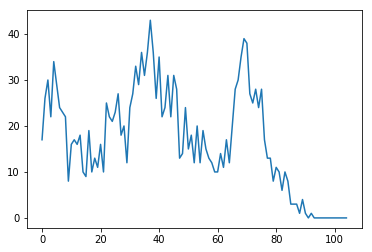

In [13]:
# A test result of male population distribution alone ages:
plt.plot(getsum(divma(getxlsx(fpath,chome))))

In [14]:
def getave(data,step):
    result = []
    for i in range(math.ceil(len(data)/step)):
        result.append(int(pd.DataFrame(data).iloc[i*step:(i+1)*step].sum()))
    return result

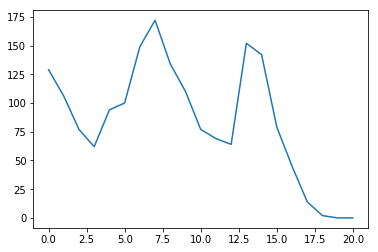

In [15]:
# A test result of male population distribution alone ages:
plt.plot(getave(getsum(divma(getxlsx(fpath,chome))),5))

## [5] Build a new dataset

In [16]:
step = 5
data = {'M': getave(getsum(divma(getxlsx(fpath,chome))),step), 
        'F': getave(getsum(divfe(getxlsx(fpath,chome))),step),
        'index': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
                  '50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99',
                  '100-104'], 
        }
Pyramid_Data = pd.DataFrame(data)

In [17]:
# A test result of dataset of both female and male population distribution alone ages:
Pyramid_Data.head(3)

,F,M,index
0,-107,129,0-4
1,-96,106,5-9
2,-74,77,10-14


In [18]:
Pyramid_Data.columns

Index(['F', 'M', 'index'], dtype='object')

## [6] Plot Histogram

[Text(0,0.5,'Age-Group'),
 Text(0.5,0,'Population'),
 Text(0.5,1,'Male Population')]

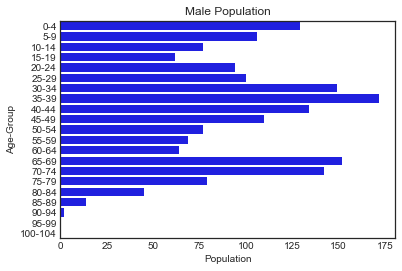

In [19]:
sns.set_style("white")
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = Pyramid_Data)
# sns is seaborn alias
bar_plot.set(ylabel="Age-Group", xlabel="Population", title = "Male Population")

[Text(0,0.5,'Age-Group'),
 Text(0.5,0,'Population'),
 Text(0.5,1,'Population Pyramid')]

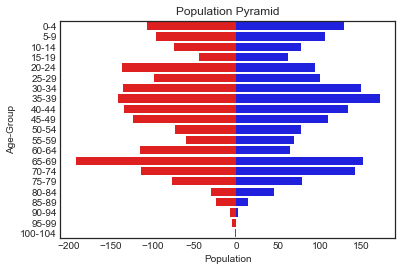

In [20]:
sns.set_style("white")
#sns.set_color_codes("pastel")
bar_plot = sns.barplot(y = 'index', x = "F", color = "red", data = Pyramid_Data)
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = Pyramid_Data)
# sns is seaborn alias
bar_plot.set(ylabel="Age-Group", xlabel="Population", title = "Population Pyramid")

[Text(0,0.5,'Age-Group'),
 Text(0.5,0,'Population'),
 Text(0.5,1,'Population Pyramid of Kashiwanoha Area (Oct.2017)')]

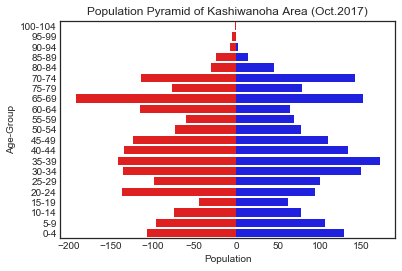

In [21]:
sns.set_style("white")
#sns.set_color_codes("pastel")
bar_plot = sns.barplot(y = 'index', x = "F", color = "red", data = Pyramid_Data,
                      order = ['100-104','95-99','90-94','85-89','80-84',
                               '70-74','75-79','65-69','60-64','55-59',
                               '50-54','45-49','40-44','35-39','30-34',
                               '25-29','20-24','15-19','10-14','5-9','0-4'])
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = Pyramid_Data,
                      order = ['100-104','95-99','90-94','85-89','80-84',
                               '70-74','75-79','65-69','60-64','55-59',
                               '50-54','45-49','40-44','35-39','30-34',
                               '25-29','20-24','15-19','10-14','5-9','0-4'])
# sns is seaborn alias
bar_plot.set(ylabel="Age-Group", xlabel="Population", title = "Population Pyramid of Kashiwanoha Area (Oct.2017)")

Referance: 

* https://github.com/afolaborn/Python_Jupyter_Notebook/tree/master/Population-Pyramid

* http://pda.readthedocs.io/en/latest/chp5.html